<H1>Unsupervised Learning and NGS

This lab will walk you through some examples of unsupervised learning in NGS.

In [48]:
library(golubEsets)
data(Golub_Merge)

<H2> MDS/PCA

We have loaded the Golub_Merge data set that was used in this morning's lecture. It is a pretty complex data type used by Bioconductor.

In [49]:
class(Golub_Merge)
head(Golub_Merge)
summary(Golub_Merge)


[1] "ExpressionSet"
attr(,"package")
[1] "Biobase"

ExpressionSet (storageMode: lockedEnvironment)
assayData: 1 features, 72 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: 39 40 ... 33 (72 total)
  varLabels: Samples ALL.AML ... Source (11 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
  pubMedIds: 10521349 
Annotation: hu6800 

       Length         Class          Mode 
            1 ExpressionSet            S4 

In [50]:
#Fortunately, bioconductor has a function to extract the expression data:

Golub.expression.data=exprs(Golub_Merge)
head(Golub.expression.data)
dim(Golub.expression.data)


,39,40,42,47,48,49,41,43,44,45,46,70,71,72,68,69,67,55,56,59,52,53,51,50,54,57,58,60,61,65,66,63,64,62,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,34,35,36,37,38,28,29,30,31,32,33
AFFX-BioB-5_at,-342,-87,22,-243,-130,-256,-62,86,-146,-187,-56,-55,-59,-131,-154,-79,-76,-34,-95,-12,-21,-202,-112,-118,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176,-214,-139,-76,-135,-106,-138,-72,-413,5,-88,-165,-67,-92,-113,-107,-117,-476,-81,-44,17,-144,-247,-74,-120,-81,-112,-273,-20,7,-213,-25,-72,-4,15,-318,-32,-124,-135
AFFX-BioB-M_at,-200,-248,-153,-218,-177,-249,-23,-36,-74,-187,-43,-44,-114,-126,-136,-118,-98,-144,-118,-172,-13,-274,-185,-142,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284,-153,-73,-49,-114,-125,-85,-144,-260,-127,-105,-155,-93,-119,-147,-72,-219,-213,-150,-51,-229,-199,-90,-321,-263,-150,-233,-327,-207,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
AFFX-BioB-3_at,41,262,17,-163,-28,-410,-7,-141,170,312,43,12,23,-50,49,-30,-153,-17,59,12,8,59,24,212,102,-82,-77,38,-21,-5,63,-46,-124,-81,-58,-1,-307,265,-76,215,238,7,106,42,-71,84,-31,-118,-126,-50,-18,-119,100,79,-157,-168,-11,-114,-85,-78,-76,-50,-57,136,124,-1,-125,2,-95,49,-37,-70
AFFX-BioC-5_at,328,295,276,182,266,24,142,252,174,142,177,129,146,211,180,68,237,152,270,172,38,309,170,314,319,178,340,31,396,141,95,146,431,9,88,283,309,12,168,71,55,-2,268,219,82,25,173,243,149,257,301,78,207,218,132,-24,-36,255,316,54,81,101,132,318,325,392,241,193,312,230,330,337
AFFX-BioC-3_at,-224,-226,-211,-289,-170,-535,-233,-201,-32,114,-116,-108,-171,-206,-257,-110,-215,-174,-229,-137,-128,-456,-197,-401,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294,-295,-264,-376,-419,-230,-272,-399,-541,-210,-178,-163,-179,-233,-127,-205,-218,-403,-152,-146,-262,-151,-308,-317,-342,-418,-244,-439,-369,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407
AFFX-BioDn-5_at,-427,-493,-250,-268,-326,-810,-284,-384,-318,-148,-184,-301,-227,-287,-273,-264,-122,-289,-383,-205,-245,-581,-400,-452,-385,-320,-364,-226,-394,-206,-230,-596,-696,-493,-558,-400,-650,-585,-284,-558,-551,-790,-535,-246,-430,-323,-227,-398,-284,-402,-394,-340,-221,-404,-347,-571,-499,-396,-461,-275,-616,-529,-478,-557,-464,-510,-411,-155,-344,-508,-423,-566


[1] 7129   72

In [51]:
# Now, we compute the distance matrix:

Golub.distance.matrix=dist(t(Golub.expression.data))

# We used 't' to transpose the matrix. This is just because dist works on rows and we want distance on columns.

head(Golub.distance.matrix)
dim(as.matrix(Golub.distance.matrix))
head(diag(as.matrix(Golub.distance.matrix)))

[1] 101530.75  94405.04 115681.47 116666.76  93189.94 101409.86

[1] 72 72

39 40 42 47 48 49 
 0  0  0  0  0  0

In [55]:
# cmdscale takes the distance matrix and produces a 72x2 matrix,
#    while preserving the distances between the 72 subjects.

MDS=cmdscale(Golub.distance.matrix) 
dim(MDS)
head(dist(MDS))
tail(dist(MDS))

[1] 72  2

[1] 16038.24 29333.98 23552.94 64453.98 23270.24 18897.47

[1] 44770.00 33146.35 13152.08 17088.72 32164.24 23191.59

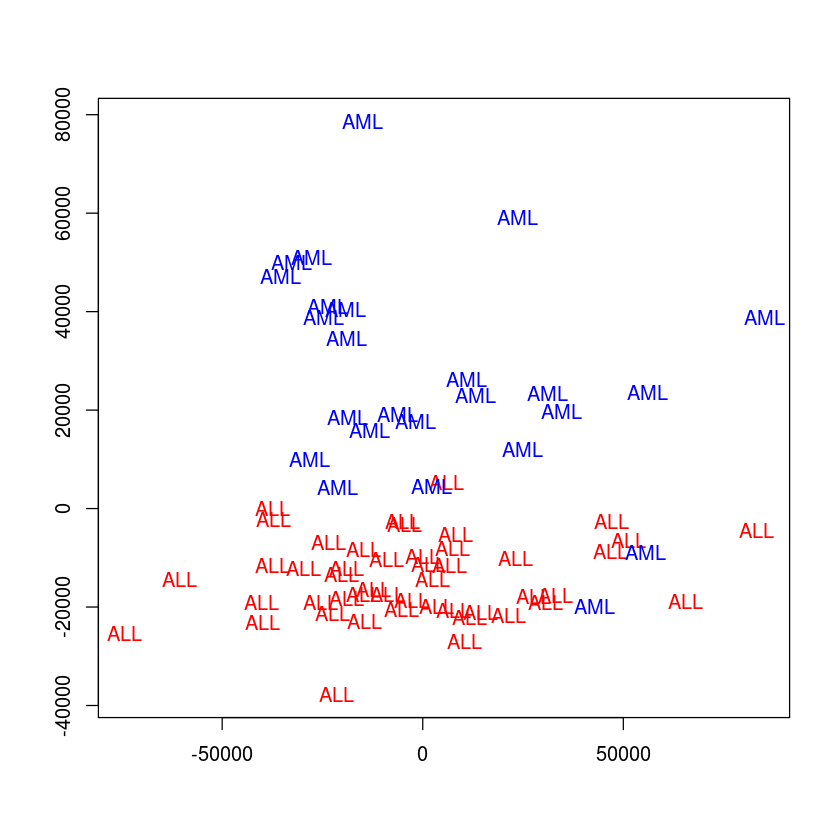

In [27]:
# Now, we just plot the result.

plot(MDS,col=c(2,4)[ pData(Golub_Merge)[["ALL.AML"]]],pch=19,type="n",xlab="",ylab="")  
text(MDS,as.character(pData(Golub_Merge)[["ALL.AML"]]),col=c(2,4)[pData(Golub_Merge)[["ALL.AML"]]])

# We observe the clustering of AML patients together and ALL patients together.


<H2> Agglomerative Hierarchical Clustering

Boy, is that a mouthful! But it is a really, really simple thing. We just cluster points by combining the closest pairs, keeping track of the 'hierarchy' or order in which clusters were made.

<H2> k-Means Clustering

<H2> Heat Map

We will now generate the 'noisy' heatmap from this morning's lecture. We will generate data with *no* correspondence between gene expression and group membership.

In [56]:
# Simulate noisy HM
# load the necessary libraries

library(pheatmap)
library(genefilter)





Attaching package: ‘genefilter’

The following object is masked from ‘package:base’:

    anyNA



In [67]:
# n = number of members of each group, m = number of genes, alpha = significance level
# The data simulation is almost exactly the same as the noise simulation from the supervised learning lab

simulate.noise.heatmap=function(n,m,alpha)
  {
    # Simulate Expression Matrix
    
    EXPRS=matrix(rnorm(2*n*m),m,2*n) # Just randomly chosen, normally distributed values (N(0,1))
    
    rownames(EXPRS)=paste("Gene",1:m,sep="")
    colnames(EXPRS)=paste("patient id",1:(2*n),sep="")
    
    # Assign first n patients to group 1, second n patients to group 2
    grp=factor(rep(0:1,c(n,n))) 
    
    # Get the two sample t-statistics
    # run rowttests on the expression values and extract the p-values for each gene
    pvals=rowttests(EXPRS, grp)$p.value

    
    #Choose the genes that have p-values smaller than significance level
    topgenes=which(pvals<alpha)
    EXPRS=EXPRS[topgenes,]
    
    # Just annotate which group each patient is in
    annodat=data.frame(Condition=ifelse(grp==0,"N","Y"),row.names=colnames(EXPRS))
   

    # draw heatmap
    pheatmap(EXPRS,
             border_color =NA,
             show_rownames = FALSE,
             show_colnames=FALSE,
             annotation_col=annodat,
             color=colorRampPalette(c("red3", "black", "green3"))(50),
             annotation_colors=list(Condition=c(Y="blue",N="yellow")))
    
    return(length(topgenes))  # return the number of topgenes found
}



[1] 104


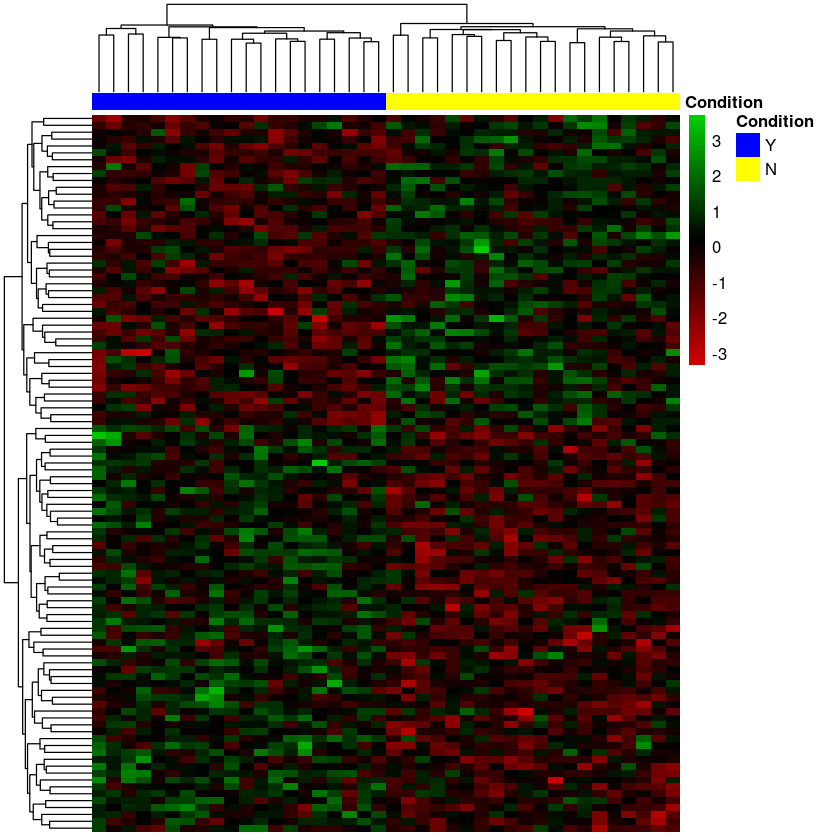

In [68]:
set.seed(765)

# run with sample of 20000 genes and significance 0.005
aa=simulate.noise.heatmap(20,20000,0.005)
print(aa)



[1] 99


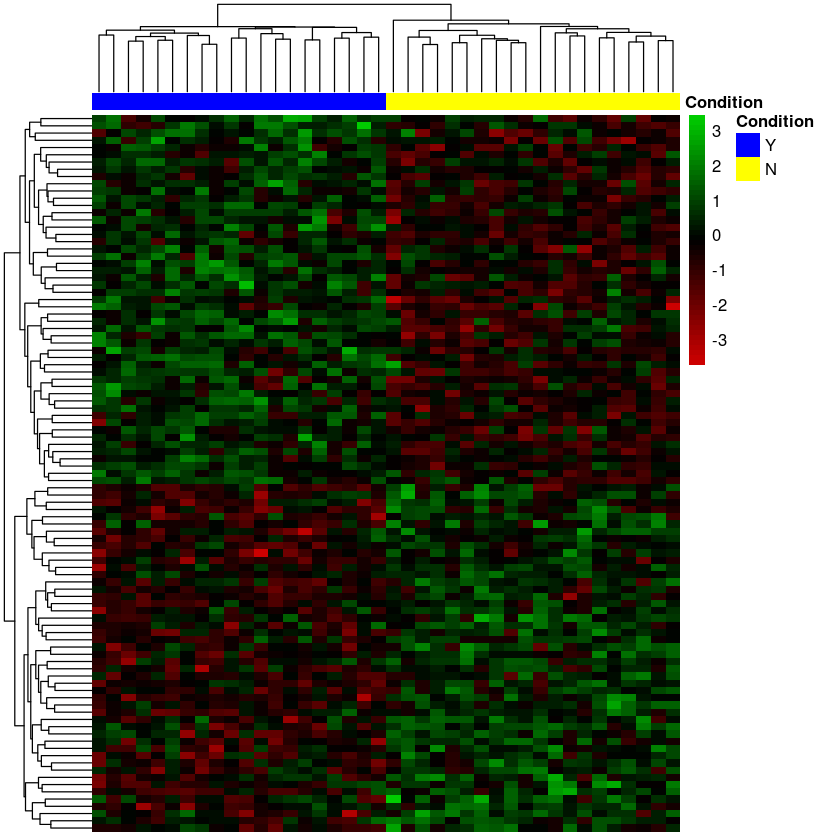

In [69]:
#Now simulate 40000 genes with significance 0.0025
aa=simulate.noise.heatmap(20,40000,0.0025)
print(aa)



[1] 110


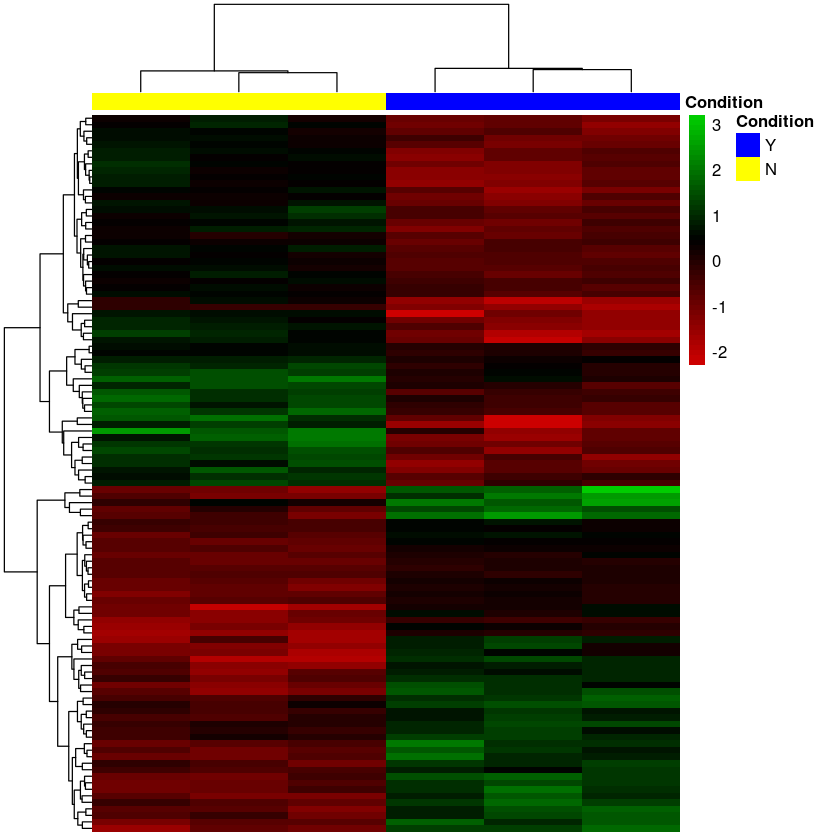

In [70]:
# And now a sample of only 6 patients, with 20000 genes and significance level of 0.005
aa=simulate.noise.heatmap(3,20000,0.005)
print(aa)